<a href="https://colab.research.google.com/github/abhisheknagpure8/bike-sharing-demand-prediction/blob/main/ML_Project_Regression_Bike_Sharing_Demand_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


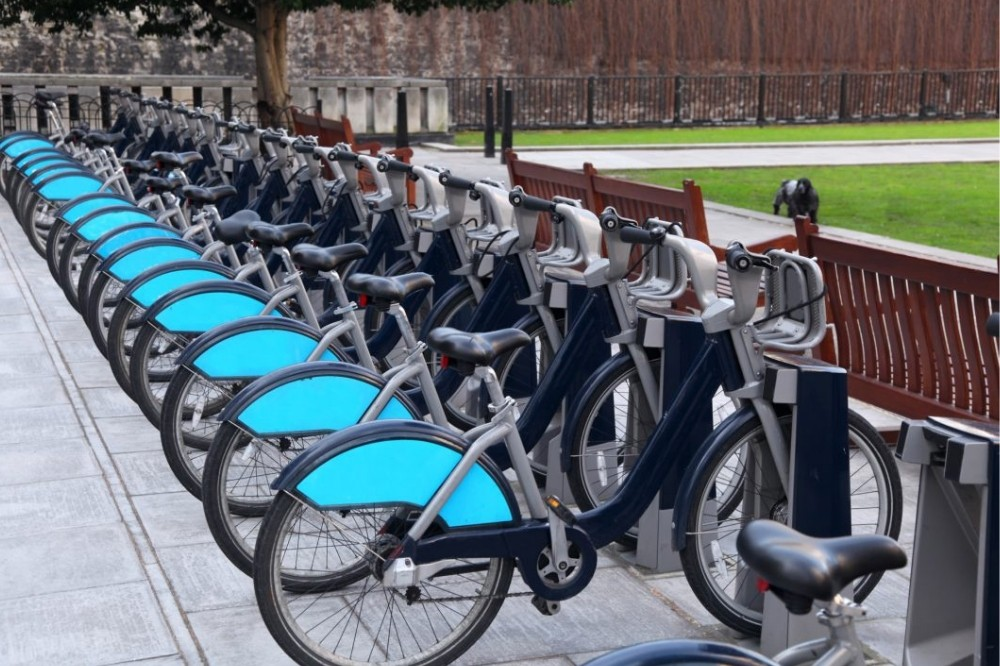

# **Project Summary -**

###Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

###The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


###Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modules/Module 1-Python/Projects/{Bike Sharing Demand Prediction(Regression)} Abhishek Nagpure/SeoulBikeData.csv',encoding = "ISO-8859-1")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


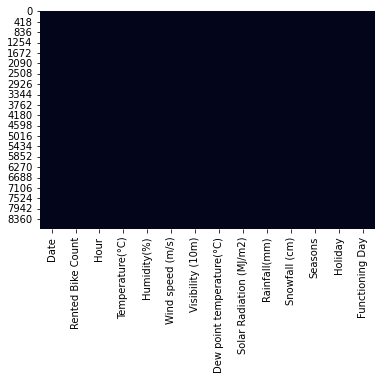

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

###This Dataset contains 8760 lines and 14 columns.In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.
###The goal is to understand and take the prediction of bike count required at each hour for the stable supply of rental bikes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description 

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique(),".")

No. of unique values in Date is 365 .
No. of unique values in Rented Bike Count is 2166 .
No. of unique values in Hour is 24 .
No. of unique values in Temperature(°C) is 546 .
No. of unique values in Humidity(%) is 90 .
No. of unique values in Wind speed (m/s) is 65 .
No. of unique values in Visibility (10m) is 1789 .
No. of unique values in Dew point temperature(°C) is 556 .
No. of unique values in Solar Radiation (MJ/m2) is 345 .
No. of unique values in Rainfall(mm) is 61 .
No. of unique values in Snowfall (cm) is 51 .
No. of unique values in Seasons is 4 .
No. of unique values in Holiday is 2 .
No. of unique values in Functioning Day is 2 .


###Changing column name

In [ ]:
#Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

## 3. ***Data Wrangling***

###Data Wrangling Code

Breaking date column

In [ ]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] =df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

* So we convert the "date" column into 2 different column i.e "month","day_of_week".
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###Changing data type

In [ ]:
#Change the int64 column into catagory column
cols=['month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   int64   
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

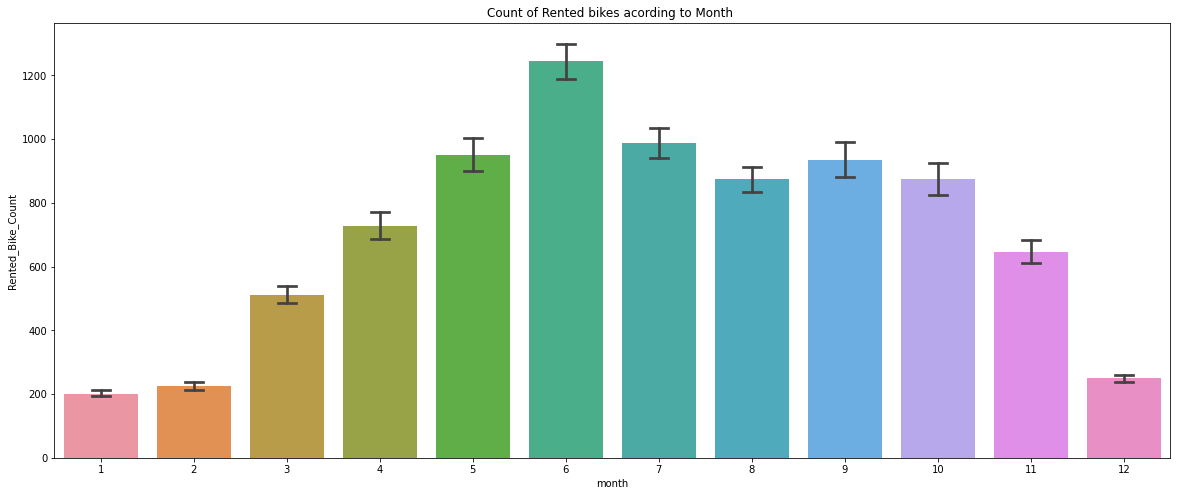

In [ ]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

#####I pick bar plotbeacause it is a chart that compares different categories of data using rectangular bars that represent the value of the data.


##### 2. What is/are the insight(s) found from the chart?

#####From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#####It will create a impact because from month 5 to 10 there is lot of demand of rented bike demand. Therefore the rental bike provider should be aware and convinced about the bike demand in this month. 

#### Chart - 2

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

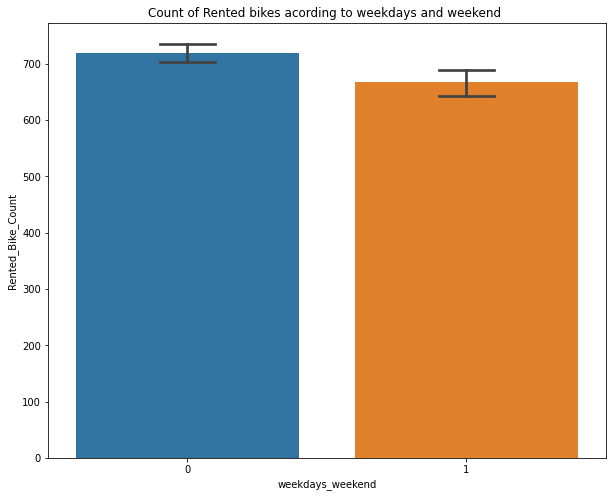

In [ ]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

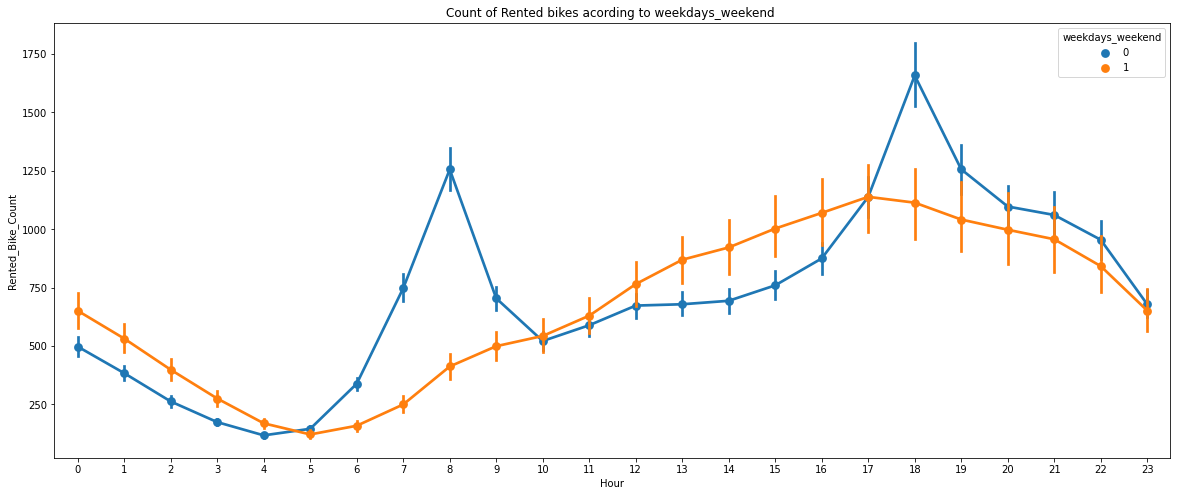

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### 1. Why did you pick the specific chart?

#####A bar plot is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent.

#####A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.



##### 2. What is/are the insight(s) found from the chart?

#####From the above point plot and bar plot we can say that in the week days which represent in blue colur bar show that the demand of the bike higher because of the office timings .Peak Time of office are 7 am to 9 am at morning and 5 pm to 7 pm at evening.
#####The orange colur bar represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

wdsghjk,.


#### Chart - 3

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

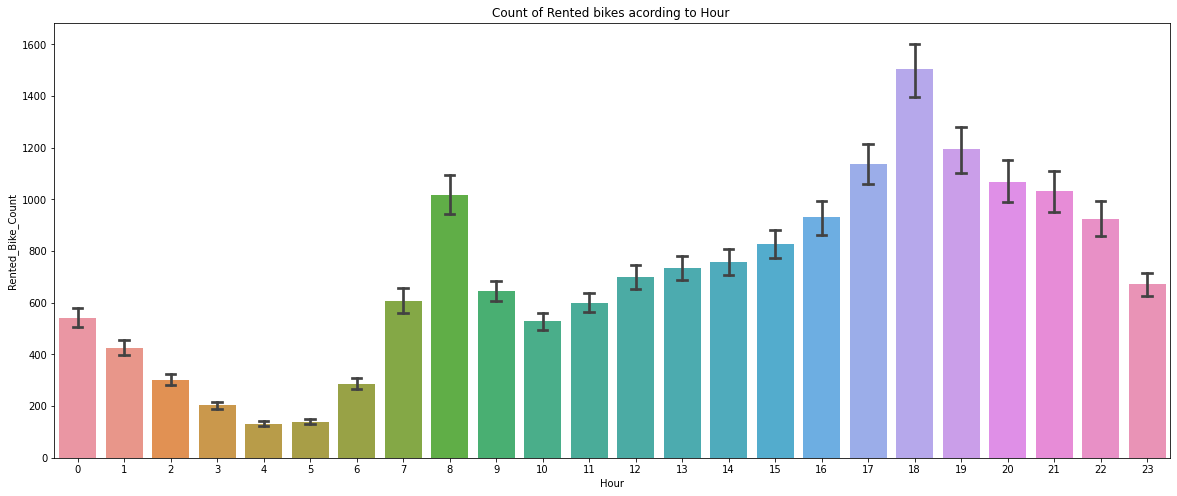

In [ ]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

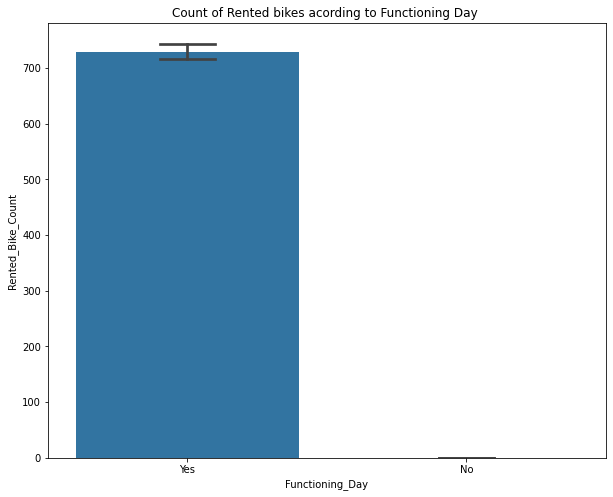

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

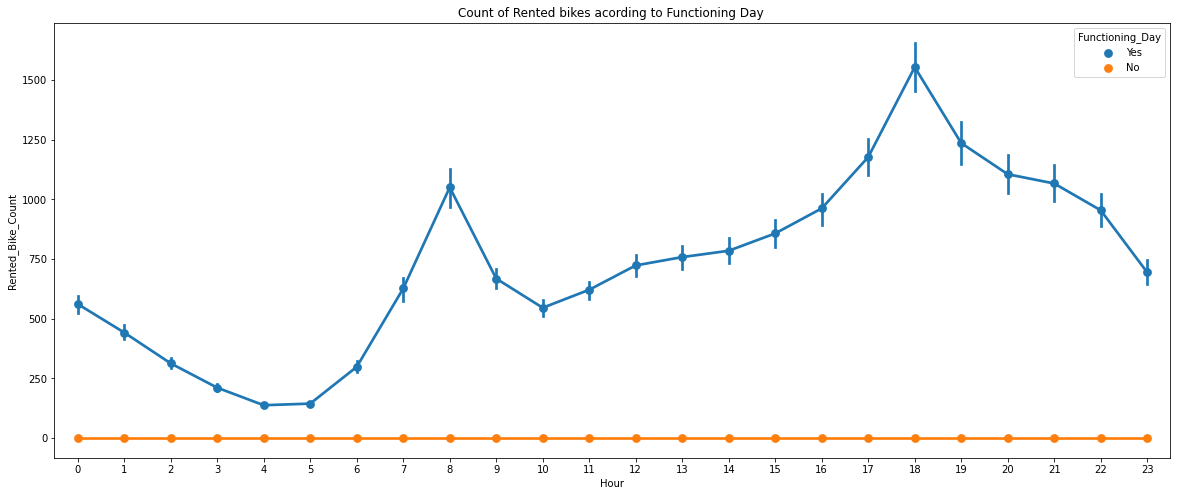

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

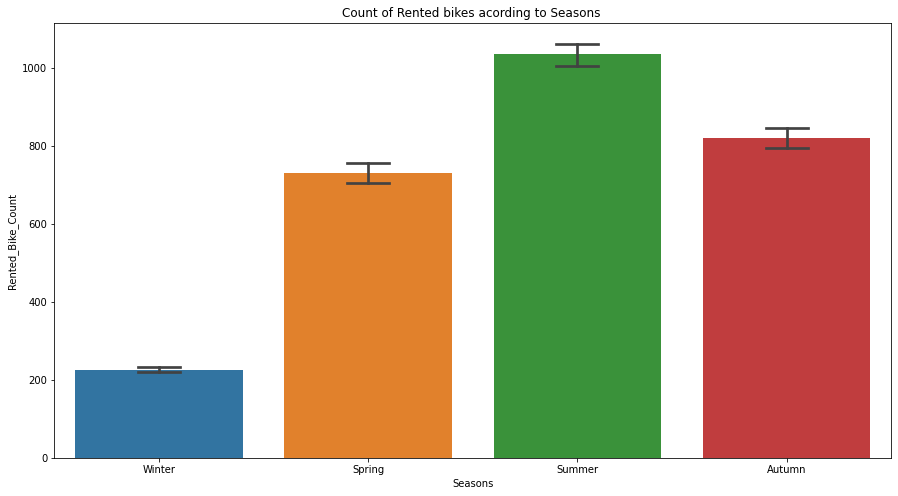

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

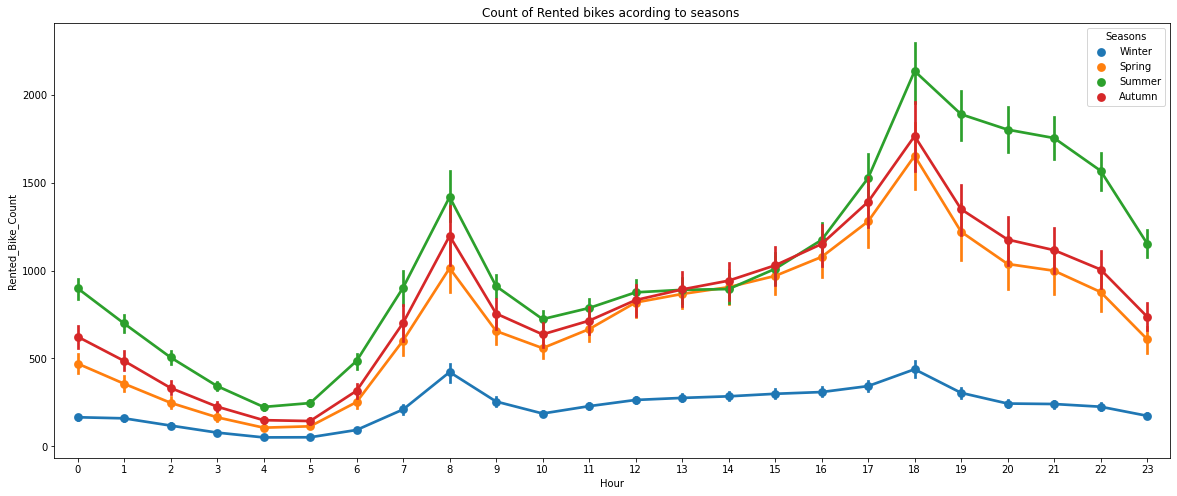

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

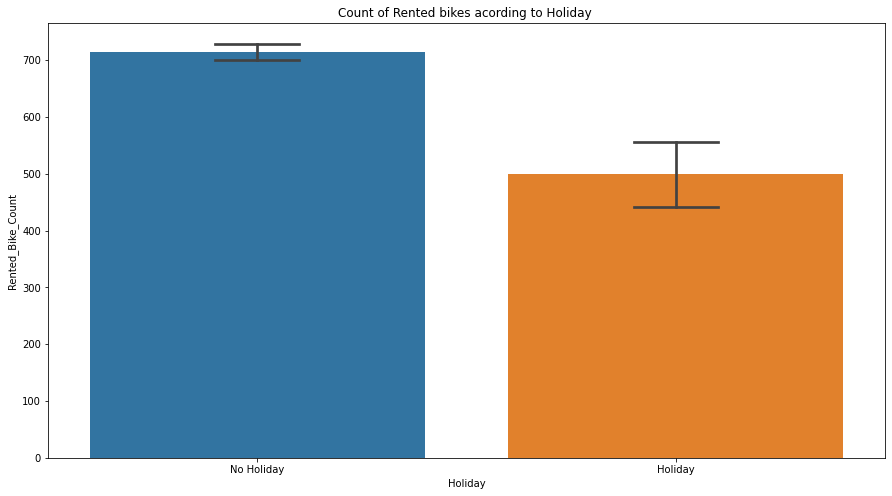

In [ ]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

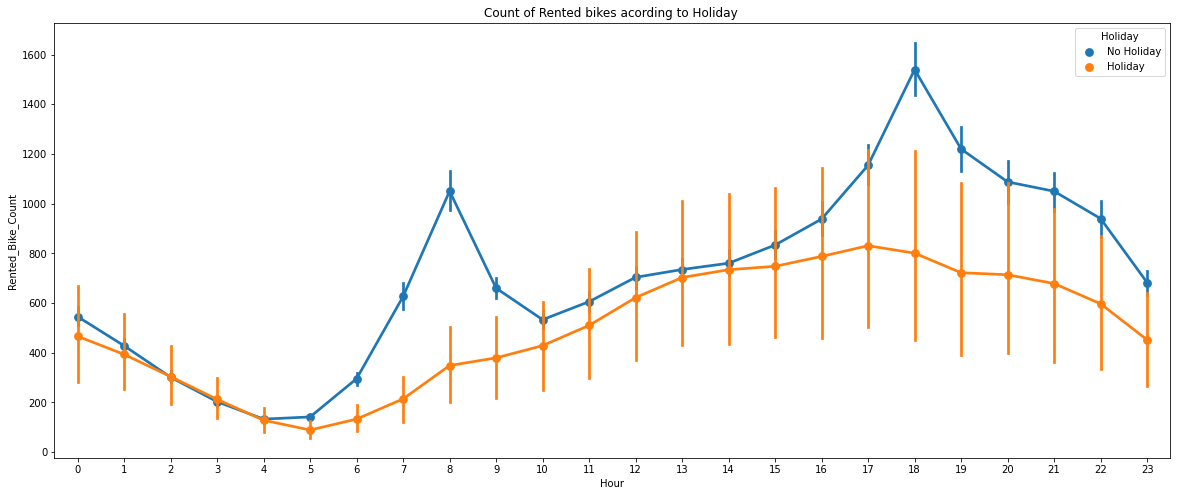

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

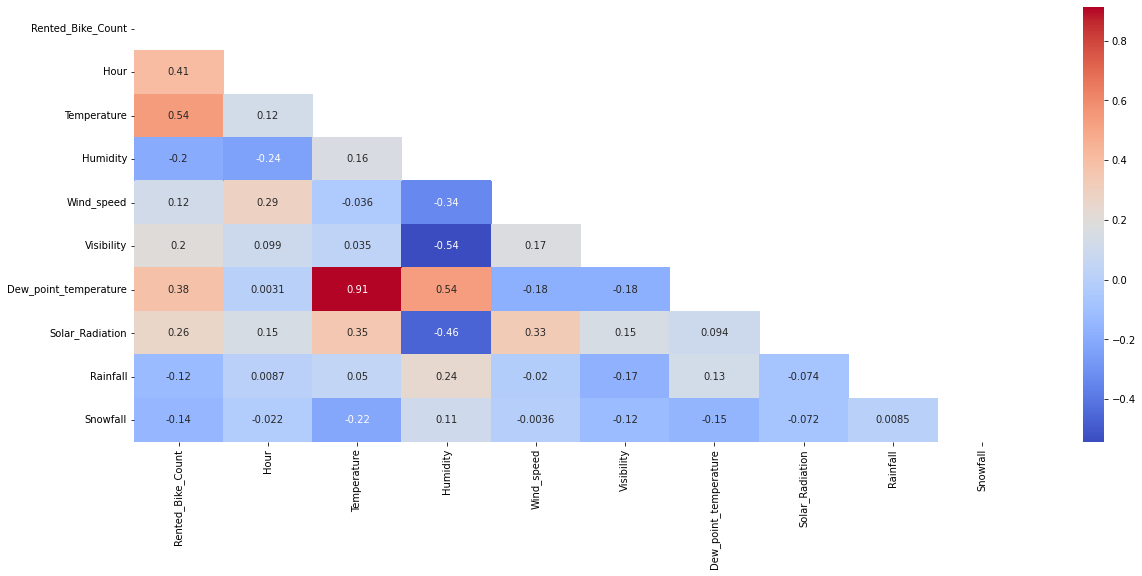

In [ ]:
# Correlation Heatmap visualization code
# Plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :
* the temperature
* the dew point temperature
* the solar radiation

And most negatively correlated variables are:
* Humidity
* Rainfall

#### Chart - 15 - Pair Plot 

In [ ]:
# # Pair Plot visualization code
# sns.pairplot(df, hue="Rented_Bike_Count")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()
df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

#####There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(df.describe().columns)-{'Rented_Bike_Count','Hour'})
possible_outlier_cols

['Humidity',
 'Dew_point_temperature',
 'Visibility',
 'Temperature',
 'Solar_Radiation',
 'Rainfall',
 'Wind_speed',
 'Snowfall']

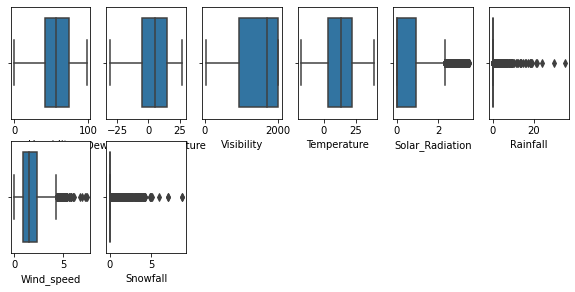

In [ ]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(3,6,index+1)
  sns.boxplot(df[item])

Here we can see that the columns that contain outliers are Wind_speed, Snowfall,Rainfall and Solar_Radiation

In [ ]:
#Creating a list of columns that contains outliers
outlier_cols = ['Wind_speed', 'Snowfall','Rainfall','Solar_Radiation']
outlier_cols

['Wind_speed', 'Snowfall', 'Rainfall', 'Solar_Radiation']

In [ ]:
#Finding the inter-quartile range for the columns with outliers
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Wind_speed         1.40
Snowfall           0.00
Rainfall           0.00
Solar_Radiation    0.93
dtype: float64

In [ ]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [ ]:
#Detecting and removing the outliers
df[outlier_cols] = df[outlier_cols][~((df[outlier_cols] < l_fence) | (df[outlier_cols] > u_fence))]

In [ ]:
#Checking the number of outliers deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   int64   
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8599 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8119 non-null   float64 
 8   Rainfall               8232 non-null   float64 
 9   Snowfall               8317 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.

Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.

In [ ]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [ ]:
#Calling the imputing function
impute_null(outlier_cols)

In [ ]:
#Checking if the imputation is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   int64   
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used the numerical outlier technique This is the simplest, nonparametric outlier detection method and define the upper and lower boundry as defined below

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ

### 3. Categorical Encoding

In [ ]:
#Look of the dataframe after encoding all three columns
df.columns.value_counts()

Rented_Bike_Count        1
Hour                     1
Temperature              1
Humidity                 1
Wind_speed               1
Visibility               1
Dew_point_temperature    1
Solar_Radiation          1
Rainfall                 1
Snowfall                 1
Seasons                  1
Holiday                  1
Functioning_Day          1
month                    1
weekdays_weekend         1
dtype: int64

In [ ]:
#extracting numeric columns
numeric_features= df.select_dtypes(exclude='object')

In [ ]:
numeric_features

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


In [ ]:
df.shape

(8760, 15)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the columns categorical columns like .
In one-hot encoding, categorical data are represented as vectors of zeros and ones. This is done by using a separate dummy variable for each category, and setting the value of the dummy variable to 1 if the observation belongs to that category and 0 otherwise.

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection


#### 1. Feature Manipulation

In [ ]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


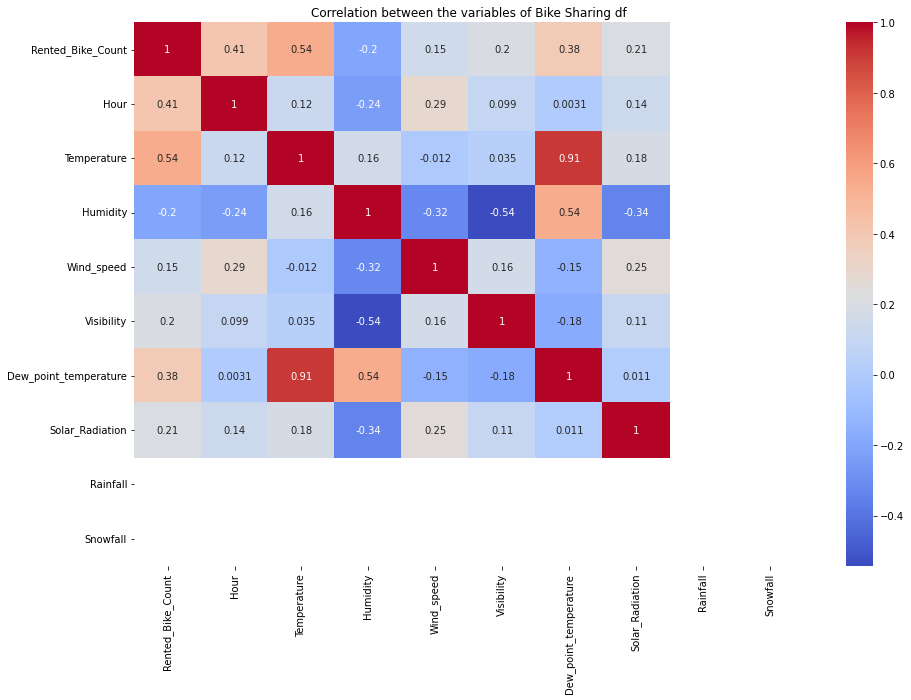

In [ ]:
#Checking correlation for feature removal
#Plotting correlation matrix using sns.heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


#### 2. Feature Selection

In [ ]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#Calculating the VIF for independent columns

calc_vif(df[[i for i in df.describe().columns]])

,Columns,VIF
0,Rented_Bike_Count,3.999326
1,Hour,4.940607
2,Temperature,26.746226
3,Humidity,5.047836
4,Wind_speed,5.010402
5,Visibility,8.587173
6,Dew_point_temperature,14.476154
7,Solar_Radiation,1.714626
8,Rainfall,NaN
9,Snowfall,NaN


We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented.

The columns Rainfall and Snowfall have no VIF at all so we will drop them too.

In [ ]:
df.drop(columns=['Dew_point_temperature','Rainfall','Snowfall'],axis=1,inplace=True)

In [ ]:
#Calculating VIF for remaining independent columns
calc_vif(df[[i for i in df.describe().columns]])

,Columns,VIF
0,Rented_Bike_Count,3.985606
1,Hour,4.610269
2,Temperature,3.528871
3,Humidity,4.106252
4,Wind_speed,4.532189
5,Visibility,4.700573
6,Solar_Radiation,1.586062


Now that we don't have any variable with VIF>10 we can move ahead.

These are our final numerical variables to be considered for model building.

In [ ]:
# Select your features wisely to avoid overfitting
categorical_features= df.select_dtypes(include='object')

In [ ]:
categorical_features

,Seasons,Holiday,Functioning_Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [ ]:
# One Hot Encoding
seasons_onehot = pd.get_dummies(df['Seasons'], prefix='Seasons')

# drop the original features
df.drop('Seasons', axis=1, inplace=True)

# concatenate the one-hot encoded season feature with the rest of the data
df = pd.concat([df, seasons_onehot], axis=1)

In [ ]:
# Numerical Encoding for holiday and functioning_day
df['Holiday'] = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
df['Functioning_Day'] = df['Functioning_Day'].map({'Yes': 1, 'No': 0})

In [ ]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,month,weekdays_weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0,1,12,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0,1,12,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0,1,12,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0,1,12,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0,1,12,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0,1,11,0,1,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0,1,11,0,1,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0,1,11,0,1,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0,1,11,0,1,0,0,0


We can see that all the remaining columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption and therefore we are good to go.

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

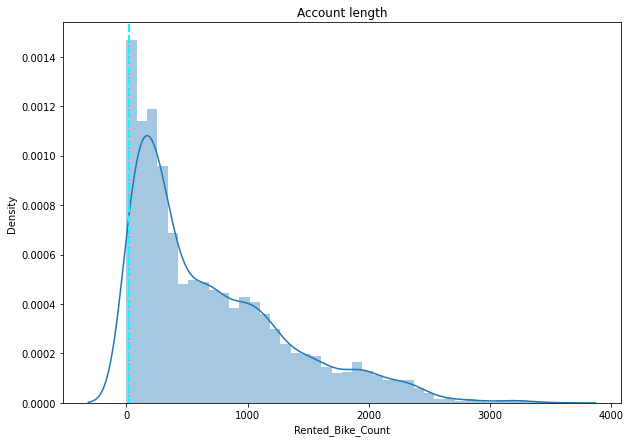

In [ ]:
# Scaling your data
fig=plt.figure(figsize=(10,7))
ax=fig.gca()
feature= np.sqrt(df['Rented_Bike_Count'])
sns.distplot(df["Rented_Bike_Count"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Account length")
plt.show()

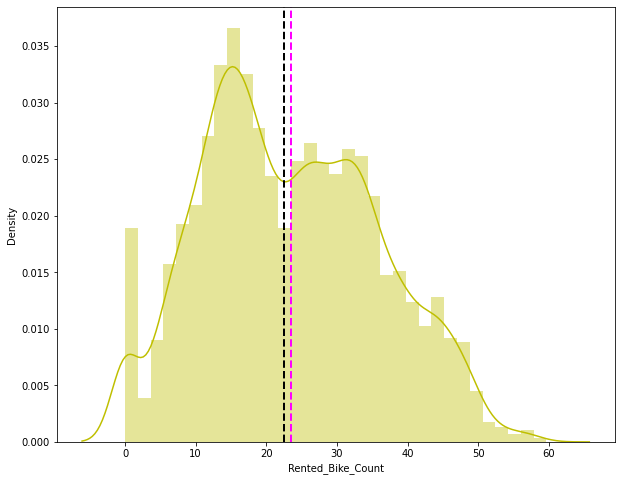

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##### Which method have you used to scale you data and why?
Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

We can see that the target variable has been normalised and we are good to go.

In [ ]:
#Creating the dataset for independent and dependent variables
X = df.drop('Rented_Bike_Count', axis=1)
y= np.sqrt(df['Rented_Bike_Count']) 

In [ ]:
X.shape

(8760, 14)

In [ ]:
#First look of the independent variable dataset
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,month,weekdays_weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,0.0,0,1,12,0,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0,1,12,0,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0,1,12,0,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0,1,12,0,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0,1,12,0,0,0,0,1


In [ ]:
#First look of the dependent variable dataset
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# # Split your data to train and test. Choose Splitting ratio wisely.
#Splitting the dataset into test and train datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Shape of the train set of the independent values
X_train.shape

(6570, 14)

In [ ]:
#Shape of the test set of the independent values
X_test.shape

(2190, 14)

In [ ]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [ ]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.5807482 ,
        -0.57582707, -0.57418668],
       [ 0.36544652,  0.93615918, -0.54181953, ...,  1.72191666,
        -0.57582707, -0.57418668],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.5807482 ,
        -0.57582707,  1.74159386],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.5807482 ,
         1.73663249, -0.57418668],
       [-1.66021162, -0.37401835,  0.04777967, ...,  1.72191666,
        -0.57582707, -0.57418668],
       [ 1.23358573, -0.47415931,  1.22697808, ...,  1.72191666,
        -0.57582707, -0.57418668]])

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

In this case the training dataset is small, that's why I have taken 75:25 ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('Evalution Matrix: ')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  

  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('Evalution Graph: ')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [ ]:
# ML Model - 1 Implementation of Linear Regression
linear= LinearRegression()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 182830.4358799589
RMSE : 427.5867583075497
R2 : 0.5616730659124458
Adjusted R2 :  0.558851651164296
Evalution Graph: 


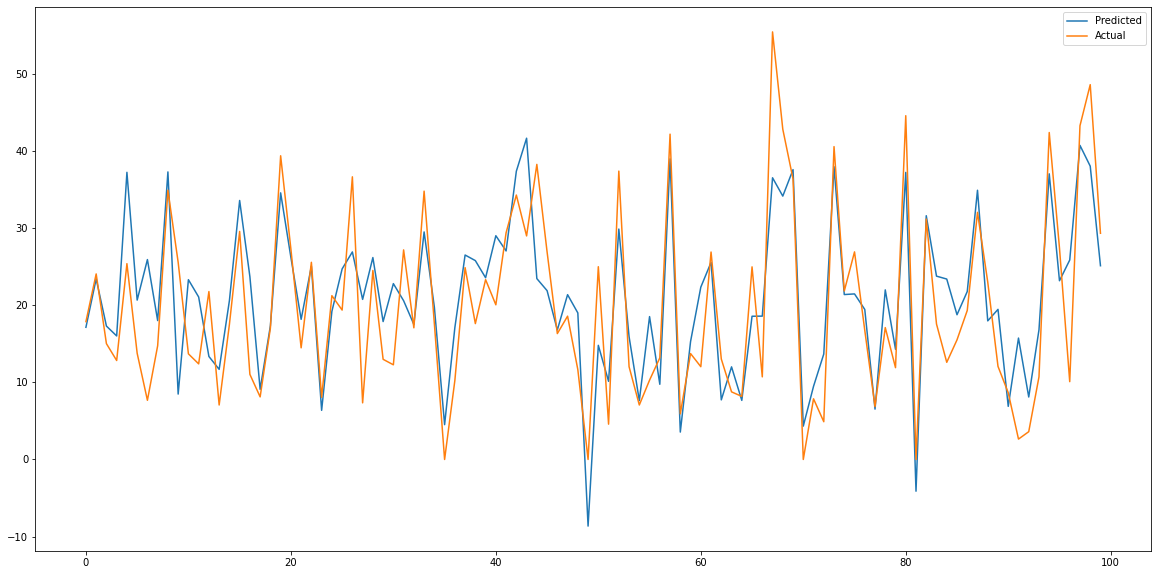

In [ ]:
#Calling train_linear_model to train,fit and evalution of Logistic Regression model
train_linear_model (linear,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###ML Model - 2 Lasso Regression

In [ ]:
# ML Model - 2 Implementation Lasso Regression
from sklearn.linear_model import Lasso
lasso= Lasso()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 210037.63858051426
RMSE : 458.29863471377945
R2 : 0.4964451420854574
Adjusted R2 :  0.49320386943681205
Evalution Graph: 


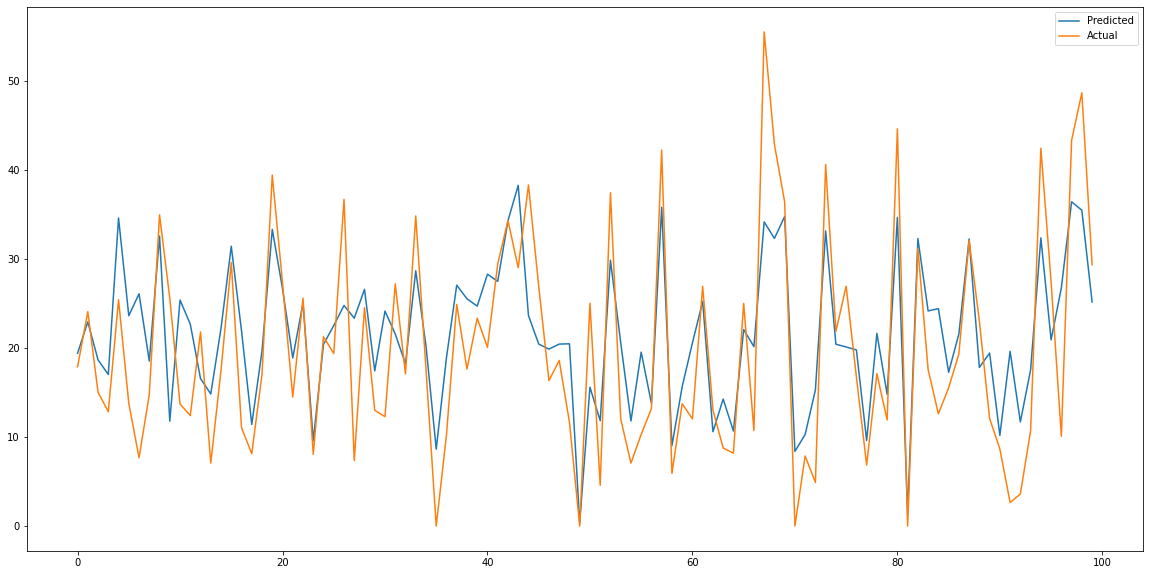

In [ ]:
#Calling train_linear_model to train,fit and evalution of Lasso model
train_linear_model(lasso,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()

#Finding the best parameters for Lasso model by GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

Evalution Matrix: 
MSE : 182928.0557716527
RMSE : 427.70089521960637
R2 : 0.5614390270467278
Adjusted R2 :  0.5586161058415113
Evalution Graph: 


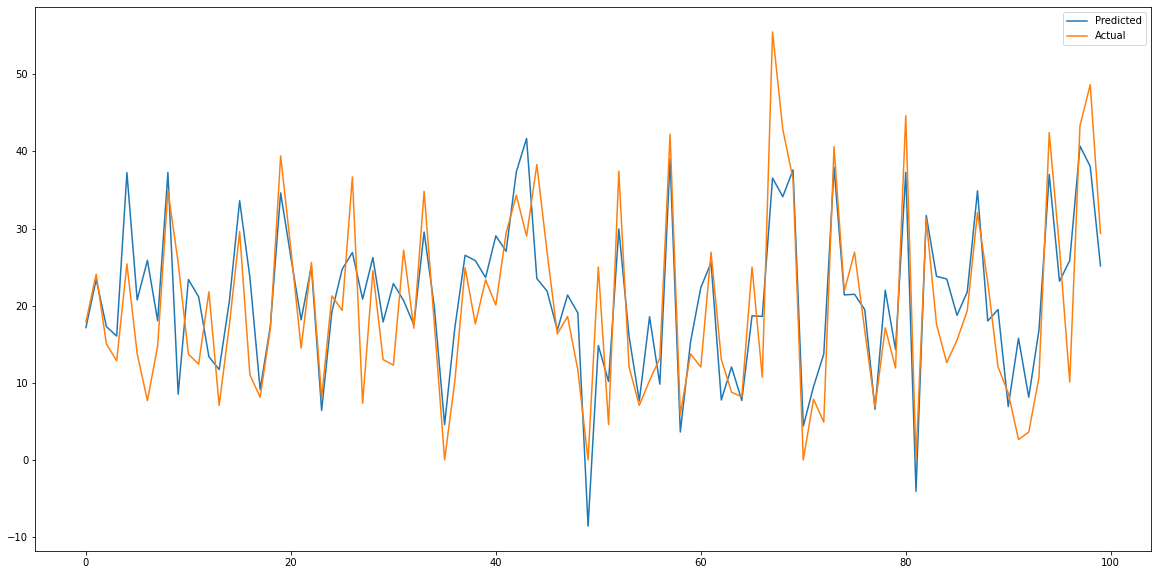

In [ ]:
#Calling train_linear_model to train,fit and evalution of Lasso model after Implementation with hyperparameter optimization techniques
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

###ML Model - 3 Ridge Regression

In [ ]:
# ML Model - 3 Implementation of Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 182835.91318384488
RMSE : 427.5931631631227
R2 : 0.5616599343470812
Adjusted R2 :  0.5588384350739128
Evalution Graph: 


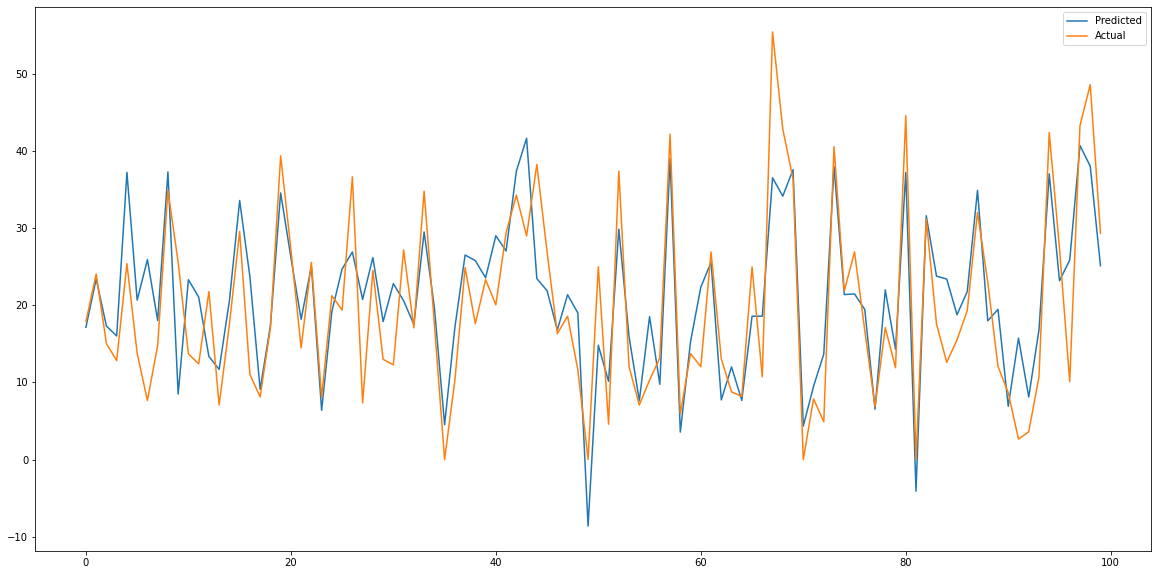

In [ ]:
#Calling train_linear_model function to train ,fit and evalution of Ridge model
train_linear_model(ridge,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_model = Ridge()

#Finding the best parameters for Ridge model by GridSearchCV
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=3)

Evalution Matrix: 
MSE : 182886.00838053992
RMSE : 427.65173725888206
R2 : 0.561539833588834
Adjusted R2 :  0.5587175612533137
Evalution Graph: 


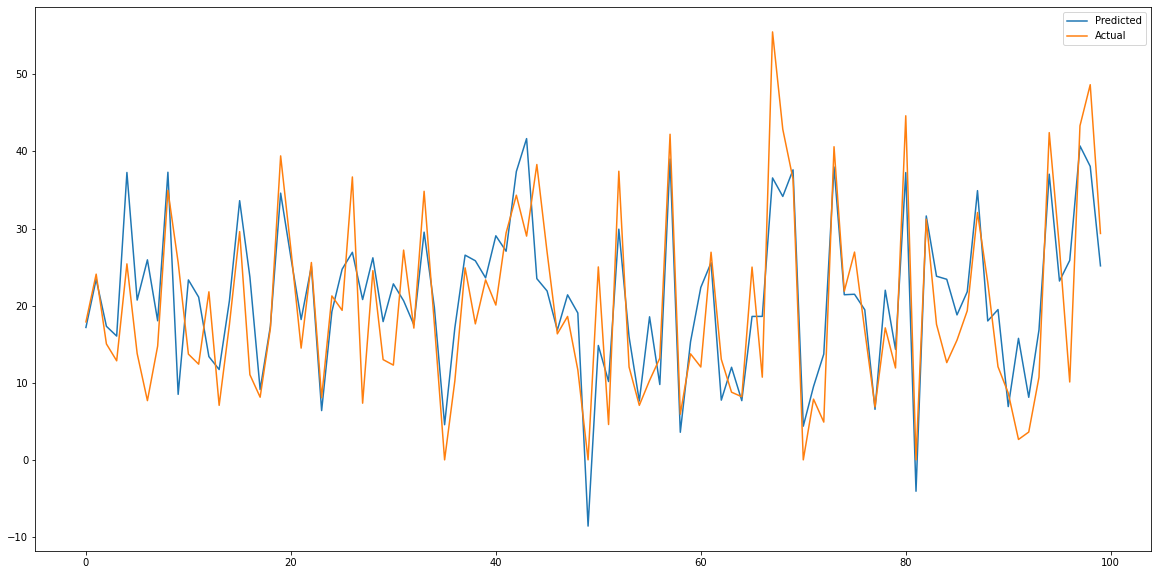

In [ ]:
#Calling train_linear_model to train,fit and evalution of Ridge model after Implementation with hyperparameter optimization techniques
train_linear_model(ridge_grid, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###ML Model - 4 Elastic Net Regression

In [ ]:
# ML Model - 4 Implementation of Eleastic Net Regresion
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 231427.31686632393
RMSE : 481.0689315122355
R2 : 0.4451644455263032
Adjusted R2 :  0.4415930902331391
Evalution Graph: 


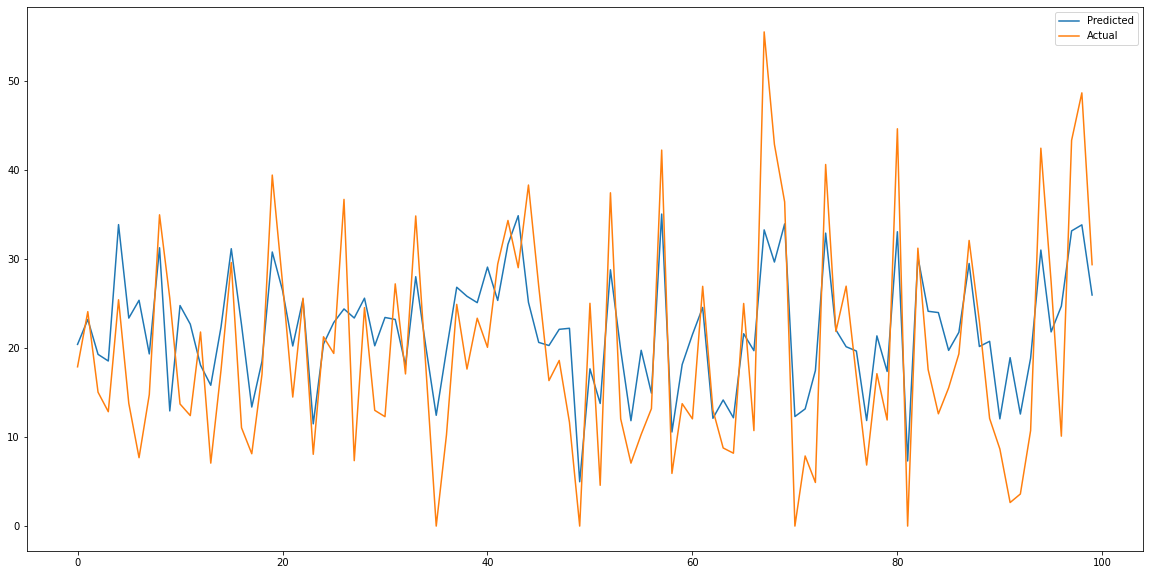

In [ ]:
#Calling train_linear_model to train,fit and evalution of ElasticNet Model
train_linear_model(elastic,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic_model = ElasticNet()

#Finding the best parameters for ElasticNet model by GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic_model, parameters, scoring='neg_mean_squared_error',cv=5)

Evalution Matrix: 
MSE : 183072.74083210353
RMSE : 427.87000459497455
R2 : 0.5610921517649923
Adjusted R2 :  0.5582669977993416
Evalution Graph: 


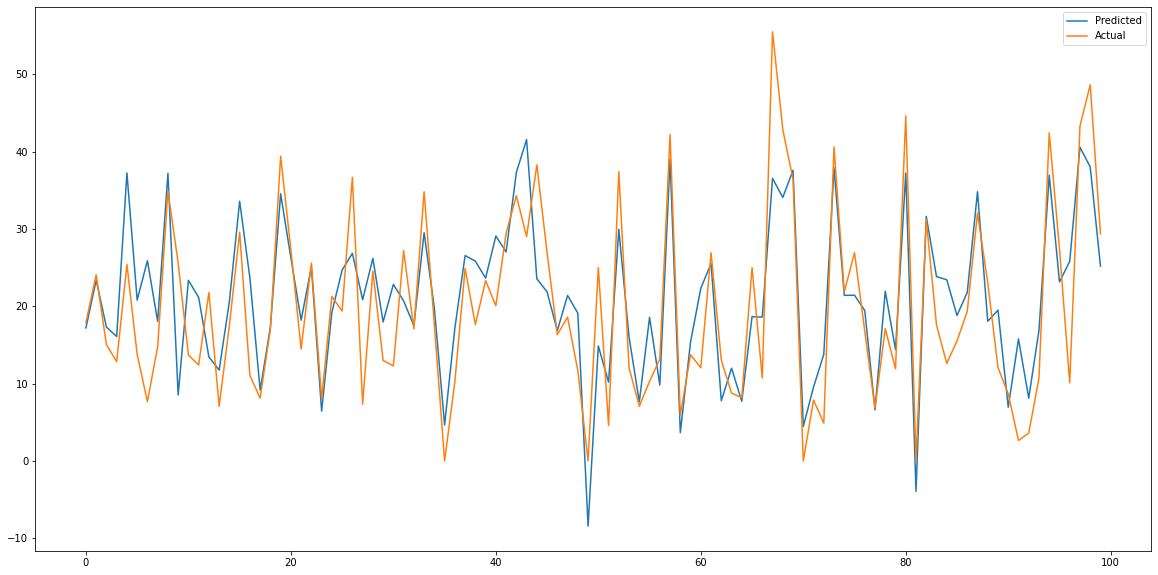

In [ ]:
#Calling train_linear_model to train,fit and evalution of Elastic Net Regression model after Implementation with hyperparameter optimization techniques
train_linear_model(elastic_grid, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###ML Model - 5 Decision Tree Regression

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('Evalution Matrix: ')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear.predict(X_train)

    

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('Evalution Graph: ') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [ ]:
# ML Model - 5 Implementation
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 23.137563491193863
RMSE : 4.810152127656033
R2 : 0.8535285794875314
Adjusted R2 :  0.852585774941704
Evalution Graph: 


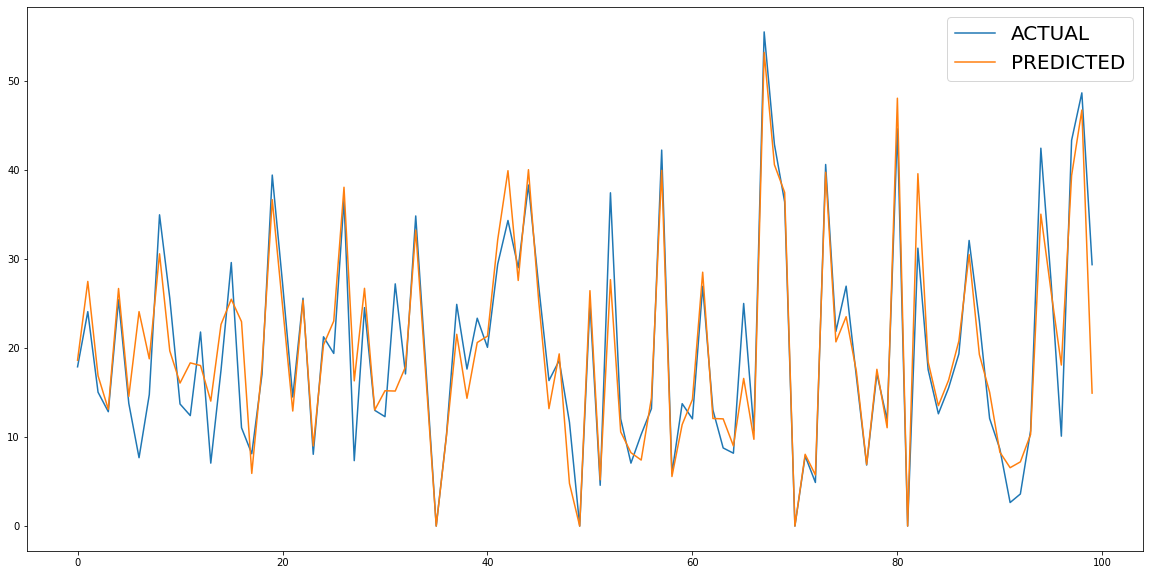

In [ ]:
#Calling train_linear_model to train,fit and evalution of Decision Tree Regression
run_model(dt,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###ML Model - 6 Random Forest

In [ ]:
# ML Model - 6 Implementation of Random Forest
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 12.136862027492413
RMSE : 3.483799940796316
R2 : 0.923168080234237
Adjusted R2 :  0.9226735299460895
Evalution Graph: 


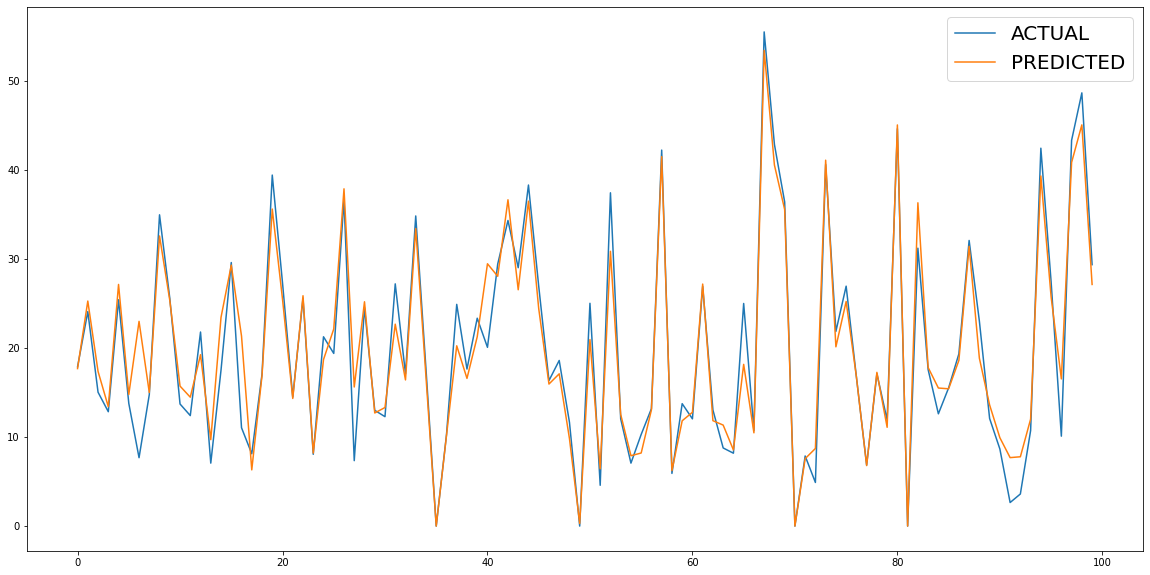

In [ ]:
#Calling run_model to train,fit and evalution of Random Forest
run_model(rf,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###ML Model - 7 Gradient Boosting

In [ ]:
# ML Model - 7 Implementation of Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evalution Matrix: 
MSE : 20.133384679613947
RMSE : 4.487024033768256
R2 : 0.8725464133304528
Adjusted R2 :  0.8717260224277523
Evalution Graph: 


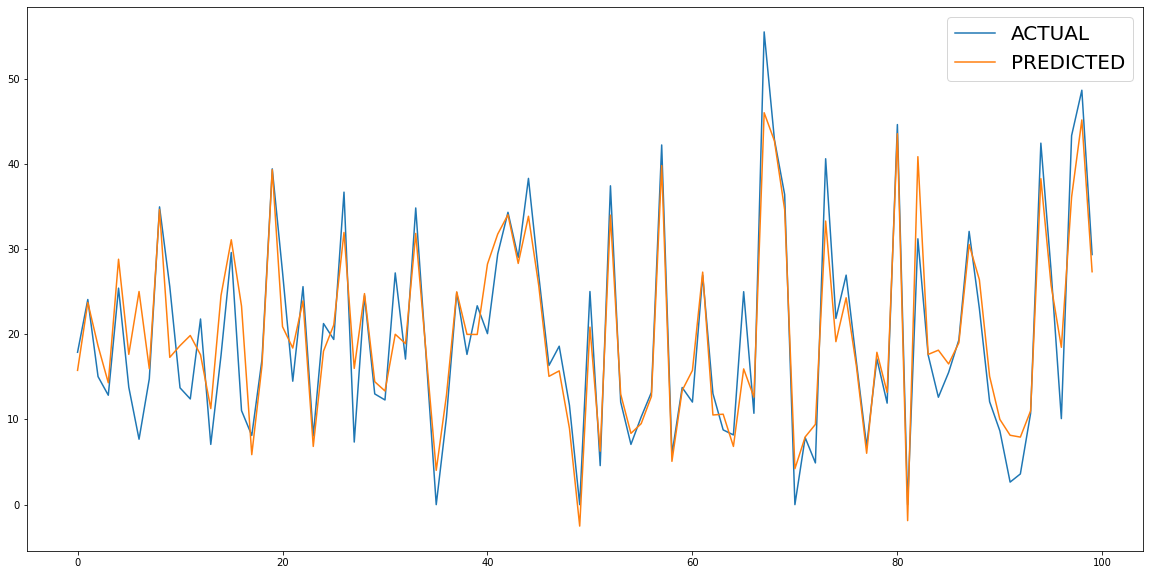

In [ ]:
#Calling run_model to train,fit and evalution of Gradient Boosting
run_model(gb,X_train,y_train,X_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gb_model=GradientBoostingRegressor()
grid_values={'n_estimators':[500,1000,1500,2500,3000],
          'max_depth':[ 15,20,30],
           }

In [ ]:
# creating the instance.
gb_= GradientBoostingRegressor()

In [ ]:
# Applying GridSearchCV.
gb_tune=GridSearchCV(gb_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
gb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ......max_depth=15, n_estimators=500;, score=nan total time=  17.4s
[CV 2/3] END ......max_depth=15, n_estimators=500;, score=nan total time=  15.2s
[CV 3/3] END ......max_depth=15, n_estimators=500;, score=nan total time=  15.0s
[CV 1/3] END .....max_depth=15, n_estimators=1000;, score=nan total time=  20.5s
[CV 2/3] END .....max_depth=15, n_estimators=1000;, score=nan total time=  20.2s
[CV 3/3] END .....max_depth=15, n_estimators=1000;, score=nan total time=  18.9s
[CV 1/3] END .....max_depth=15, n_estimators=1500;, score=nan total time=  18.9s
[CV 2/3] END .....max_depth=15, n_estimators=1500;, score=nan total time=  20.5s
[CV 3/3] END .....max_depth=15, n_estimators=1500;, score=nan total time=  18.7s
[CV 1/3] END .....max_depth=15, n_estimators=2500;, score=nan total time=  19.5s
[CV 2/3] END .....max_depth=15, n_estimators=2500;, score=nan total time=  19.7s
[CV 3/3] END .....max_depth=15, n_estimators=250

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [500, 1000, 1500, 2500, 3000]},
             scoring='accuracy', verbose=3)

In [ ]:
gb_tune.best_params_

{'max_depth': 15, 'n_estimators': 500}

In [ ]:
gb_optimal=GradientBoostingRegressor(max_depth=20,max_leaf_nodes=5,min_samples_split=2,n_estimators=3000)

Evalution Matrix: 
MSE : 11.568817692308253
RMSE : 3.4012964722746903
R2 : 0.926764062184547
Adjusted R2 :  0.9262926584468842
Evalution Graph: 


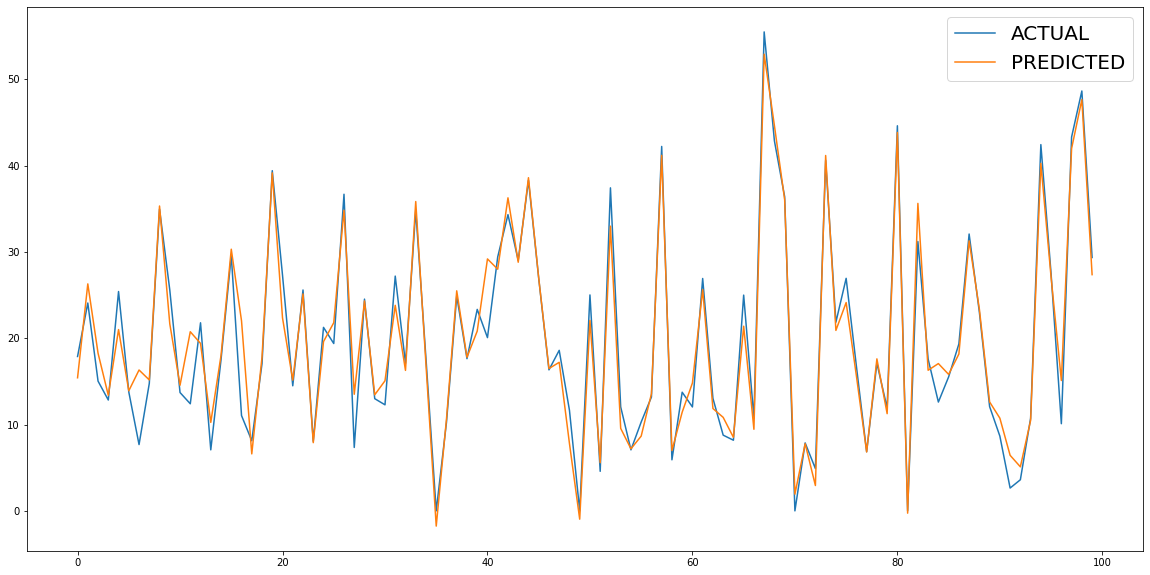

In [ ]:
#Calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_optimal,X_train,y_train,X_test,y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## Evaluation Matrix of each models

In [ ]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model made
model_name=['Linear','Lasso','Lasso_after_Tuning','Ridge','Ridge_after_Tuning','Elasticnet','Eleasticnet_after_Tuning','Decision_Tree','Random_Forest','Gradient_Boosting','Gradient_Boosting_after_Tuning']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df

,Linear,Lasso,Lasso_after_Tuning,Ridge,Ridge_after_Tuning,Elasticnet,Eleasticnet_after_Tuning,Decision_Tree,Random_Forest,Gradient_Boosting,Gradient_Boosting_after_Tuning
Mean_square_error,182830.435880,210037.638581,182928.055772,182835.913184,182886.008381,231427.316866,183072.740832,23.137563,12.136862,20.133385,11.568818
Root_Mean_square_error,427.586758,458.298635,427.700895,427.593163,427.651737,481.068932,427.870005,4.810152,3.483800,4.487024,3.401296
R2,0.561673,0.496445,0.561439,0.561660,0.561540,0.445164,0.561092,0.853529,0.923168,0.872546,0.926764
Adjusted_R2,0.558852,0.493204,0.558616,0.558838,0.558718,0.441593,0.558267,0.852586,0.922674,0.871726,0.926293


In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,182830.435880,427.586758,0.561673,0.558852
1,Lasso,210037.638581,458.298635,0.496445,0.493204
2,Lasso_after_Tuning,182928.055772,427.700895,0.561439,0.558616
3,Ridge,182835.913184,427.593163,0.561660,0.558838
4,Ridge_after_Tuning,182886.008381,427.651737,0.561540,0.558718
5,Elasticnet,231427.316866,481.068932,0.445164,0.441593
6,Eleasticnet_after_Tuning,183072.740832,427.870005,0.561092,0.558267
7,Decision_Tree,23.137563,4.810152,0.853529,0.852586
8,Random_Forest,12.136862,3.483800,0.923168,0.922674
9,Gradient_Boosting,20.133385,4.487024,0.872546,0.871726


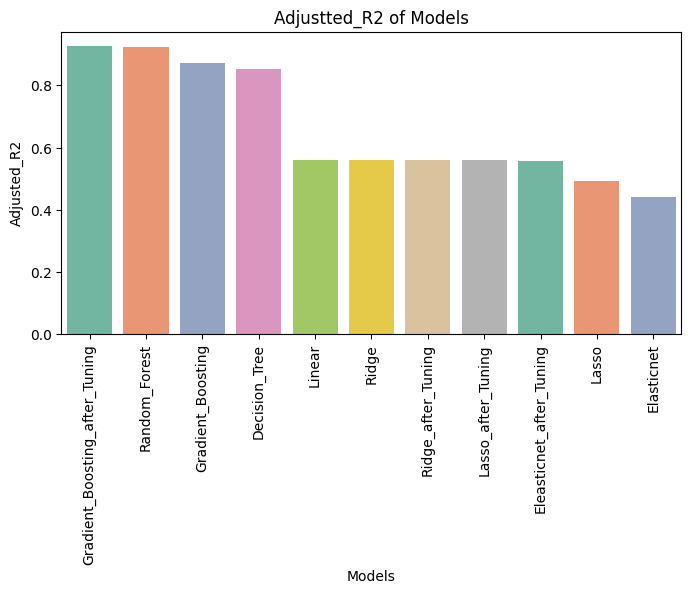

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=matrices.sort_values('Adjusted_R2',ascending=False),palette="Set2").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***